In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"D:\testing\BCT_3\data\earthquake_1995-2023.csv")


In [4]:
# Convert time column
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True)

In [5]:
df = df.sort_values('date_time')

df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
999,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,1995-05-05 03:53:00,0,7,NaN,0,776,us,0,0.0,0.0,mw,16.0,12.626,125.297,"Cabatuan, Philippines",NaN,Philippines
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,1995-05-13 08:47:00,0,9,NaN,0,670,us,0,0.0,0.0,mw,14.0,40.149,21.695,"Aianí, Greece",Europe,Greece
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,1995-05-14 11:33:00,0,6,NaN,0,732,us,0,0.0,0.0,mw,11.2,-8.378,125.127,"Maubara, Timor Leste",NaN,Indonesia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,1995-05-16 20:12:00,0,4,NaN,0,912,us,0,0.0,0.0,mw,20.2,-23.008,169.900,"Vao, New Caledonia",NaN,NaN
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,1995-05-27 13:03:00,0,9,NaN,0,776,us,0,0.0,0.0,mwb,11.0,52.629,142.827,"Tungor, Russia",Asia,Russia


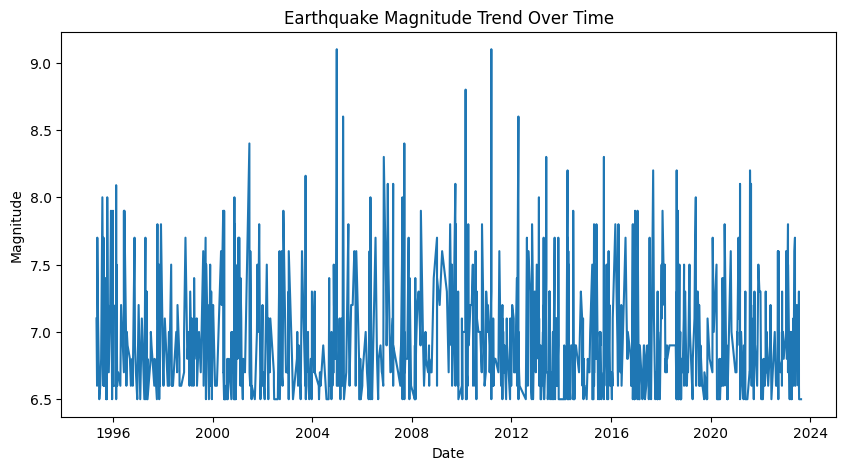

In [6]:
plt.figure(figsize=(10,5))

plt.plot(df['date_time'], df['magnitude'])

plt.title("Earthquake Magnitude Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Magnitude")

plt.show()

In [7]:
df['time_diff'] = df['date_time'].diff()

print(df['time_diff'].head())

999                NaT
998    8 days 04:54:00
997    1 days 02:46:00
996    2 days 08:39:00
995   10 days 16:51:00
Name: time_diff, dtype: timedelta64[ns]


In [8]:
df['time_diff_hours'] = df['time_diff'].dt.total_seconds() / 3600

df[['date_time','time_diff_hours']].head()

,date_time,time_diff_hours
999,1995-05-05 03:53:00,NaN
998,1995-05-13 08:47:00,196.900000
997,1995-05-14 11:33:00,26.766667
996,1995-05-16 20:12:00,56.650000
995,1995-05-27 13:03:00,256.850000


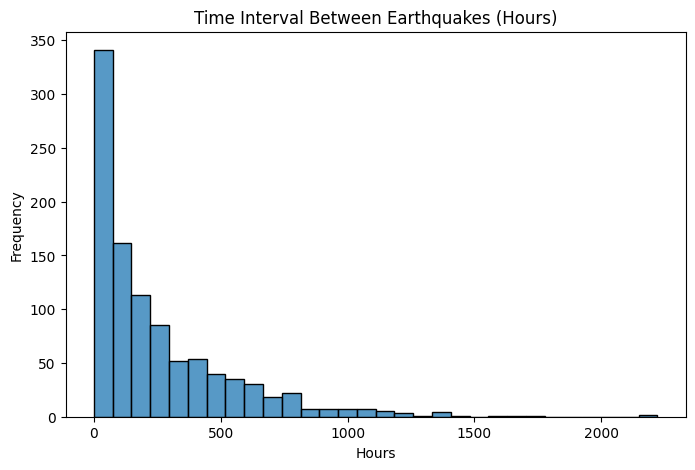

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['time_diff_hours'], bins=30)

plt.title("Time Interval Between Earthquakes (Hours)")
plt.xlabel("Hours")
plt.ylabel("Frequency")

plt.show()

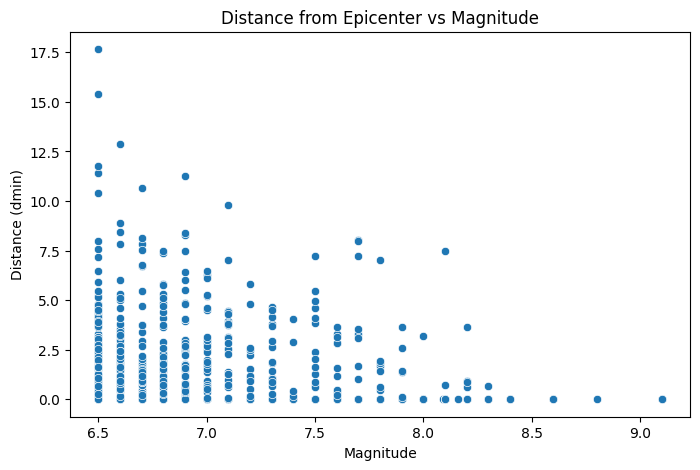

In [10]:
plt.figure(figsize=(8,5))

sns.scatterplot(x="magnitude", y="dmin", data=df)

plt.title("Distance from Epicenter vs Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Distance (dmin)")

plt.show()

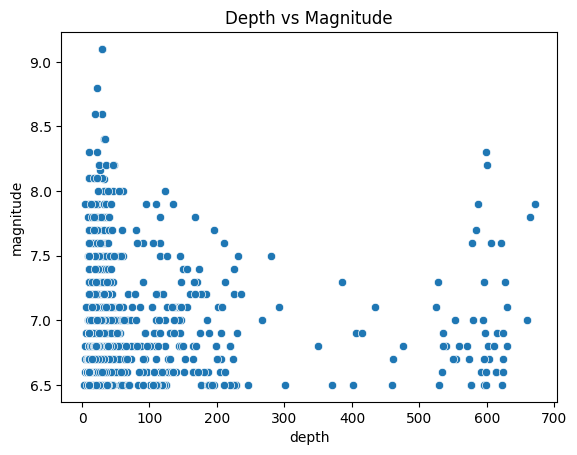

In [11]:
sns.scatterplot(x="depth", y="magnitude", data=df)

plt.title("Depth vs Magnitude")
plt.show()

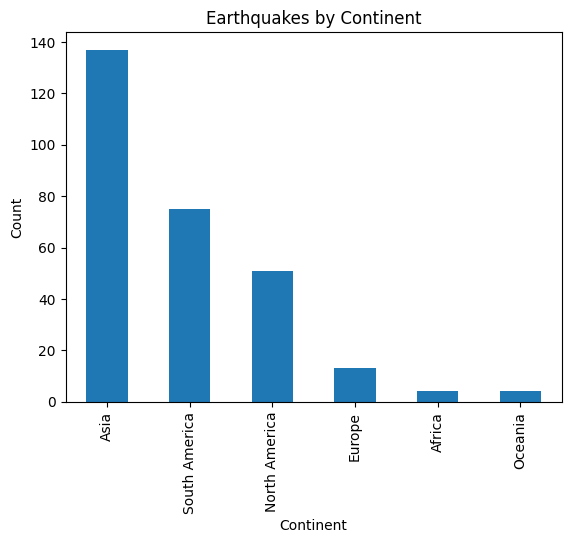

In [12]:
df['continent'].value_counts().plot(kind='bar')

plt.title("Earthquakes by Continent")
plt.xlabel("Continent")
plt.ylabel("Count")

plt.show()

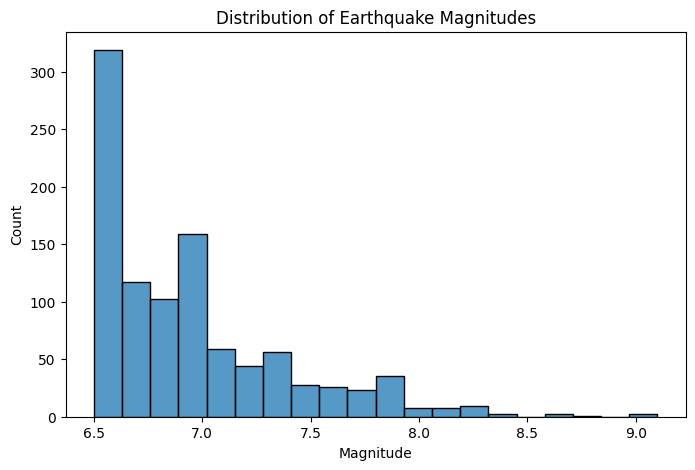

In [13]:
plt.figure(figsize=(8,5))

sns.histplot(df['magnitude'], bins=20)

plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Count")

plt.show()

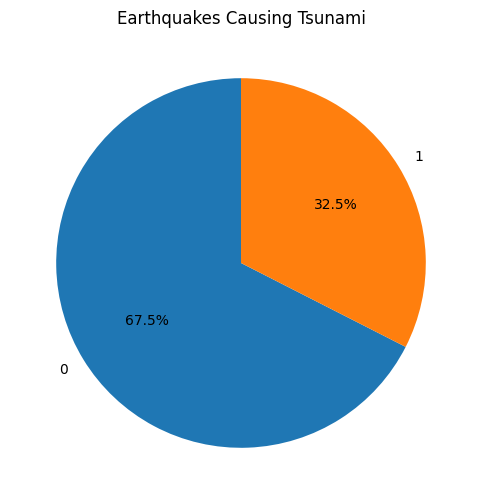

In [14]:
tsunami_counts = df['tsunami'].value_counts()

plt.figure(figsize=(6,6))

plt.pie(tsunami_counts,
        labels=tsunami_counts.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Earthquakes Causing Tsunami")

plt.show()

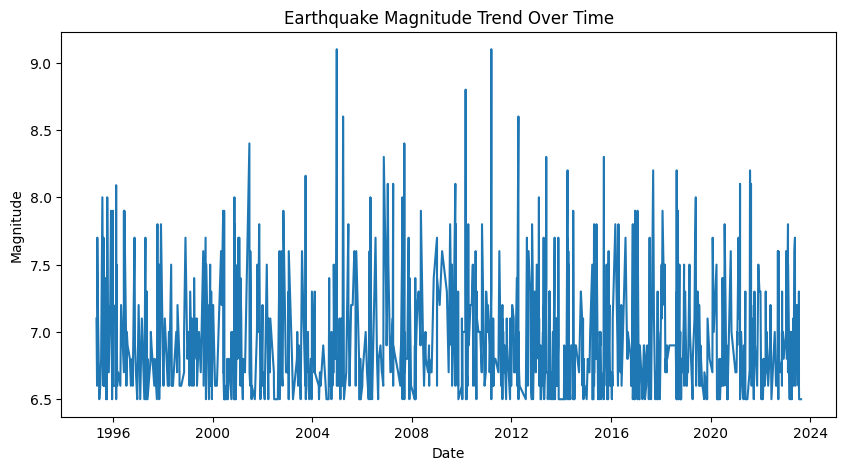

In [15]:
# Sort data
df = df.sort_values("date_time")

plt.figure(figsize=(10,5))

plt.plot(df['date_time'], df['magnitude'])

plt.title("Earthquake Magnitude Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Magnitude")

plt.show()